# Self-study Codio activity: LASSO regression
---

## Overview

In this activity, you will build a LASSO regression model using the LASSO loss function and scipy's `minimize` function.

This activity is designed to build your familiarity and comfort coding in Python while also helping you review key topics from each module. As you progress through the activity, questions will get increasingly more complex. It is important that you adopt a programmer's mindset when completing this activity. Remember to run your code from each cell before submitting your activity, as doing so will give you a chance to fix any errors before submitting.



### Learning outcome addressed

- Apply nonlinear optimisation to regularised least squares regression.



## Index:

- [Question 1](#Question-1)
- [Question 2](#Question-2)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Small Example

Below, a simple data set involving data about dining at a restaurant and the tips given to wait staff is loaded and displayed.  The goal will be to predict the tip using the bill. 

In [ ]:
tips = sns.load_dataset('tips')

In [4]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


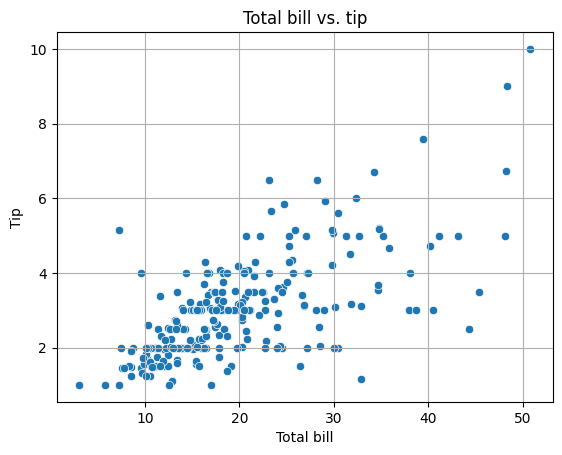

In [5]:
sns.scatterplot(data = tips, x = 'total_bill', y = 'tip')
plt.title('Total bill vs. tip')
plt.xlabel('Total bill')
plt.ylabel('Tip')
plt.grid();

### The LASSO model

The loss function for a LASSO regression model is given below as `lasso`.  The function takes in a parameter vector `beta` and returns the squared error plus the penalty term.  This will be used to find a line of best fit for the tips data.  In this example, there is no y-intercept.

In [6]:
def lasso(beta):
    loss = (beta*x - y)**2 + alpha*np.abs(beta)
    return np.mean(loss)

In [7]:
x = tips['total_bill']
y = tips['tip']
alpha = 0.1

In [8]:
#lasso loss with slope of 1
lasso(1)

346.18162254098354

This is a minimisation problem where your goal is to find the parameter `beta` that minimises the `lasso` function.  Below, the `minimize` function is used to determine the parameters that minimise the `lasso` loss function. The results are displayed.

In [9]:
from scipy.optimize import minimize

In [10]:
results = minimize(lasso, x0 = 0)

In [11]:
print(f'The parameter that minimizes the lasso loss with alpha: {alpha} is slope: {results.x[0] :.4f}')

The parameter that minimizes the lasso loss with alpha: 0.1 is slope: 0.1436


Using more inputs is a simple adjustment to the loss function given below.  This is then implemented using the `total_bill` and `size` columns to demonstrate.  For more features, you would simply need to instantiate the `minimize` function with `x0` to match the number of features.  To add an intercept, you would add one and concatenate a column of ones on `x` before multiplying.

If you have multiple features, you can adjust the objective function accordingly and simply specify initial values for the parameters on each feature.  Below, this is demonstrated with `total_bill` and `size`.

In [12]:
def lasso(beta):
    loss = (x@beta - y)**2 + alpha*np.abs(np.sum(beta))
    return np.mean(loss)

In [13]:
x = tips[['total_bill', 'size']]

In [14]:
#prediction with total_bill coef = 1 and size coef = 1
lasso(np.array([1, 1]))

448.87121270491804

In [15]:
#find parameters that minimize the loss
results = minimize(lasso, x0 = (0, 0))

In [16]:
print(f'The parameters for the new model are total bill: {results.x[0]: .4f} and size: {results.x[1]: .4f}')

The parameters for the new model are total bill:  0.1067 and size:  0.3111


### Using `scikit-learn`

In practice you would likely use `sklearn` to build a LASSO regression model.  Below, the estimator is imported and a model with no $y$-intercept is fit on the tips data.  The resulting coefficient is displayed -- note the similarity to the results from the `minimize` function.

In [17]:
from sklearn.linear_model import Lasso

In [18]:
#use same alpha and no y-intercept
lasso = Lasso(alpha = 0.1, fit_intercept=False)

In [19]:
x = x[['total_bill']]
#fit model on total bill
lasso.fit(x, y)

Lasso(alpha=0.1, fit_intercept=False)

In [20]:
print(f'The sklearn lasso model is minimized with beta = {lasso.coef_[0]: .4f}')

The sklearn lasso model is minimized with beta =  0.1435


###### [Back to top](#Index:)

### Question 1

Use `sklearn` and the `Lasso` estimator with `alpha = 0.01` to build and fit a LASSO regression model on the `credit` data given as `X_train`, `y_train` below.

In [22]:
credit = pd.read_csv('credit.csv', index_col=0)

In [23]:
#task is to predict the Balance column
credit.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [24]:
X = credit[['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education']]
y = credit['Balance']

sscaler = StandardScaler()
#split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=22)
#scale the data
X_train = sscaler.fit_transform(X_train)
X_test = sscaler.transform(X_test)

In [25]:
model = ''
###BEGIN SOLUTION
model = Lasso(alpha = 0.1).fit(X_train, y_train)
###END SOLUTION
#Answer check
for col, coef in zip(X.columns.tolist(), model.coef_):
    print(f'Feature {col} has coefficient {coef: .4f}')

Feature Income has coefficient -252.1683
Feature Limit has coefficient  326.5163
Feature Rating has coefficient  278.5763
Feature Cards has coefficient  8.8645
Feature Age has coefficient -17.7623
Feature Education has coefficient  3.9519


In [26]:
### BEGIN HIDDEN TESTS
model_ = Lasso(alpha = 0.1).fit(X_train, y_train)



#
#
#
np.testing.assert_array_almost_equal(model.coef_, model_.coef_)
### END HIDDEN TESTS

###### [Back to top](#Index:)

### Question 2

Fit a second LASSO model as `model2` on the training data using `alpha = 100` -- much more of a penalty than that of the first model.

In [27]:
model2 = ''
###BEGIN SOLUTION
model2 = Lasso(alpha = 100).fit(X_train, y_train)
###END SOLUTION
#Answer check
for col, coef in zip(X.columns.tolist(), model2.coef_):
    print(f'Feature {col} has coefficient {coef: .4f}')

Feature Income has coefficient -0.0000
Feature Limit has coefficient  162.4033
Feature Rating has coefficient  143.2957
Feature Cards has coefficient  0.0000
Feature Age has coefficient -0.0000
Feature Education has coefficient  0.0000


In [28]:
### BEGIN HIDDEN TESTS
model2_ = Lasso(alpha = 100).fit(X_train, y_train)



#
#
#
np.testing.assert_array_almost_equal(model2.coef_, model2_.coef_)
### END HIDDEN TESTS

###### [Back to top](#Index:)

### Question 3

Compare the coefficients from the model with `alpha = 0.1` to that of the model with `alpha = 100`.  This is an important feature of the LASSO model -- it eliminates features that might be considered 'less important' to the model.  While it typically underperforms other regression models, the LASSO model can be used to select features.  Which of the features below are the important features based on the `alpha = 100` model?  Assign your answer `a`, `b`, `c` or `d` as a string to `ans3` below.

```
a. Income and age
b. Limit and rating
c. Age and education
d. All the features are equally important
```

In [29]:
ans3 = ''
###BEGIN SOLUTION
ans3 = 'b'
###END SOLUTION
print(type(ans3))
print(ans3)

<class 'str'>
b


In [30]:
### BEGIN HIDDEN TESTS
ans3_ = 'b'



#
#
#
assert ans3 == ans3_
### END HIDDEN TESTS

Great job!  The LASSO is another example of a nonlinear optimisation problem; however, because it is a convex loss function, you are guaranteed to find a minimimum value.  